# Installing Folium Library for Geospatial Visualization.

In [1]:
pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Load the dataset

In [3]:
restaurants_df = pd.read_csv('Dataset .csv')
restaurants_df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
restaurants_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

# Exploration of Latitude and Longitude Coordinates

In [5]:
# Plot latitude and longitude coordinates on a map
map_restaurants = folium.Map(location=[restaurants_df['Latitude'].mean(), restaurants_df['Longitude'].mean()], zoom_start=10)
for index, row in restaurants_df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(map_restaurants)
map_restaurants.save('restaurants_map.html')

# Group restaurants by city or locality

In [6]:
grouped_df = restaurants_df.groupby(['City'])

# Analyze the concentration of restaurants in different areas

In [7]:
restaurant_counts = grouped_df.size()
print(restaurant_counts)

City
Abu Dhabi          20
Agra               20
Ahmedabad          21
Albany             20
Allahabad          20
                   ..
Weirton             1
Wellington City    20
Winchester Bay      1
Yorkton             1
��stanbul          14
Length: 141, dtype: int64


# Calculate average ratings and price ranges by city or locality

In [8]:
average_ratings = grouped_df['Aggregate rating'].mean()
price_ranges = grouped_df['Price range'].mean()

# Calculate popular cuisines by city or locality
def most_frequent_cuisine(x):
    if x.count() > 0:
        return x.value_counts().index[0]
    else:
        return np.nan

popular_cuisines = grouped_df['Cuisines'].agg(most_frequent_cuisine)

print(average_ratings, popular_cuisines, price_ranges)


City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64 City
Abu Dhabi                                                   American
Agra                                           North Indian, Mughlai
Ahmedabad          Chinese, Italian, North Indian, Mexican, Medit...
Albany                                        Japanese, Steak, Sushi
Allahabad                                      North Indian, Chinese
                                         ...                        
Weirton                                      Burger, Greek, Sandwich
Wellington City                                                 Cafe
Winchester Bay                                Burger, Seafood, Steak
Yorkton  

# Created a new DataFrame to hold the calculated statistics

In [9]:
statistics_df = pd.DataFrame({
    'Average Rating': average_ratings,
    'Popular Cuisine': popular_cuisines,
    'Price Range': price_ranges,
    'Restaurant Count': restaurant_counts
})


# Visualize the distribution of average ratings on a map

In [10]:
map_average_ratings = folium.Map(location=[restaurants_df['Latitude'].mean(), restaurants_df['Longitude'].mean()], zoom_start=10)
for city, data in statistics_df.iterrows():
    folium.Marker(location=[restaurants_df.loc[restaurants_df['City'] == city, 'Latitude'].mean(),
                            restaurants_df.loc[restaurants_df['City'] == city, 'Longitude'].mean()],
                  popup=f"City: {city}<br>Average Rating: {data['Average Rating']:.2f}<br>Restaurant Count: {data['Restaurant Count']}").add_to(map_average_ratings)
map_average_ratings.save('average_ratings_map.html')

# Visualize the distribution of popular cuisines on a map

In [11]:
map_popular_cuisines = folium.Map(location=[restaurants_df['Latitude'].mean(), restaurants_df['Longitude'].mean()], zoom_start=10)
for city, cuisine in popular_cuisines.items():
    folium.Marker(location=[restaurants_df.loc[restaurants_df['City'] == city, 'Latitude'].mean(),
                            restaurants_df.loc[restaurants_df['City'] == city, 'Longitude'].mean()],
                  popup=f"City: {city}<br>Popular Cuisine: {cuisine}<br>Restaurant Count: {statistics_df.loc[city, 'Restaurant Count']}").add_to(map_popular_cuisines)
map_popular_cuisines.save('popular_cuisines_map.html')

# Calculate the average price range for each city

In [12]:
average_price_by_city = restaurants_df.groupby('City')['Price range'].mean().sort_values()

# Plotting the clustered bar plot

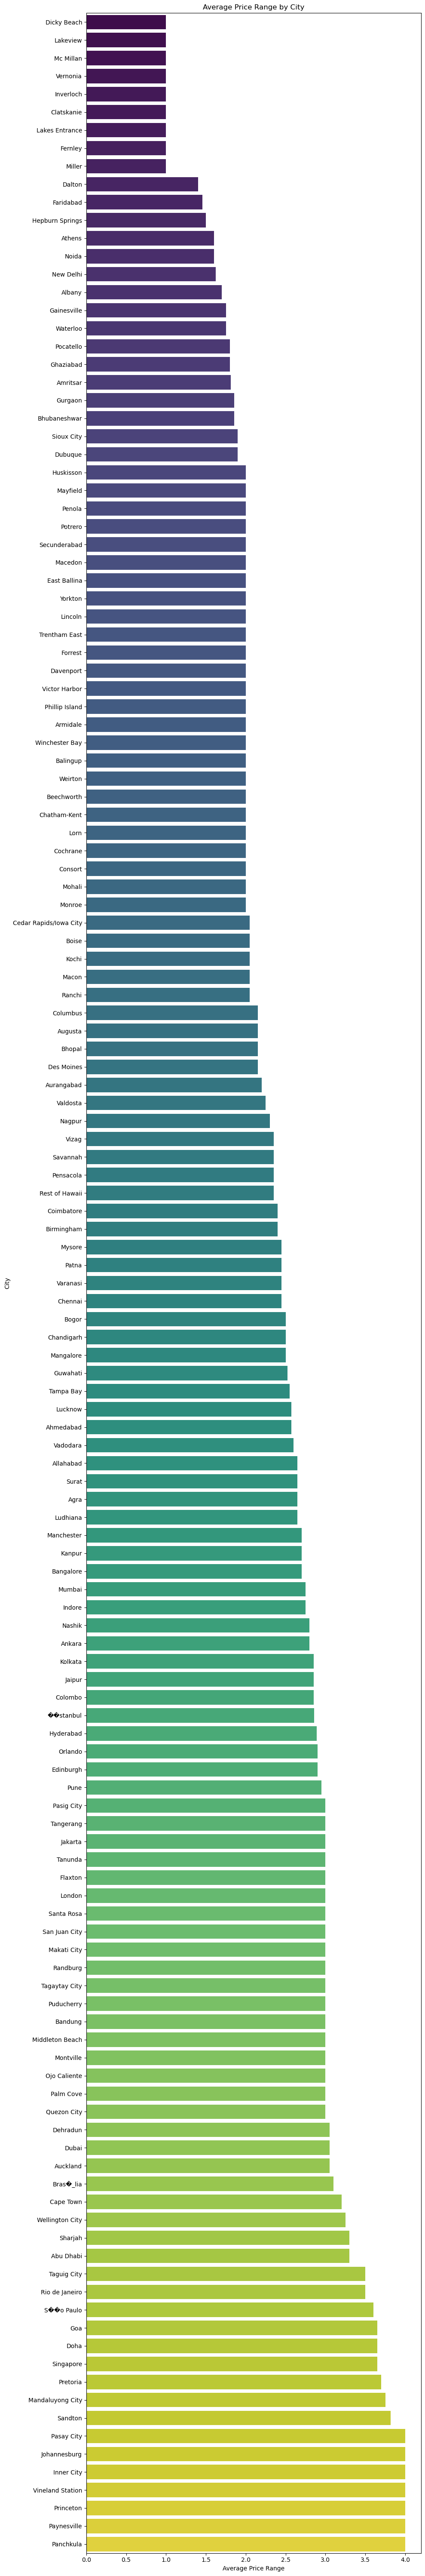

In [21]:
plt.figure(figsize=(10, 60))
sns.barplot(x=average_price_by_city.values, y=average_price_by_city.index, palette='viridis')
plt.title('Average Price Range by City')
plt.xlabel('Average Price Range')
plt.ylabel('City')
plt.tight_layout()
plt.show()